# GloVe and Word2Vec
`GloVe` and `Word2Vec` are both models for word embeddings. They use different methods to compute these embeddings. Their improvements were mainly made in the way of calculating the embeddings, with no large changes in tokenizing the text, prior to the calculations. 


GloVe is a model for word embeddings. Similar to word2Vec, it computes semantic meaningful embeddings from word context. 

- Uses the [Standford Tokenizer](https://nlp.stanford.edu/software/tokenizer.html)
- Slightly more advanced than whitespace splitting
- The stanford tokenizer is now part of the [Stanza](https://stanfordnlp.github.io/stanza) package

In [21]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize')
doc = nlp("We'll try some harder examples that don't make things easy. I own 5 dogs. The emailaddress is bauke@brenninkmeijer.nl. How do they handle repeat lettersssss??")
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-04-07 13:36:22 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-04-07 13:36:22 INFO: Use device: cpu
2022-04-07 13:36:22 INFO: Loading: tokenize
2022-04-07 13:36:22 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: We
id: (2,)	text: 'll
id: (3,)	text: try
id: (4,)	text: some
id: (5,)	text: harder
id: (6,)	text: examples
id: (7,)	text: that
id: (8,)	text: do
id: (9,)	text: n't
id: (10,)	text: make
id: (11,)	text: things
id: (12,)	text: easy
id: (13,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: I
id: (2,)	text: own
id: (3,)	text: 5
id: (4,)	text: dogs
id: (5,)	text: .
====== Sentence 3 tokens =======
id: (1,)	text: The
id: (2,)	text: emailaddress
id: (3,)	text: is
id: (4,)	text: bauke@brenninkmeijer.nl
id: (5,)	text: .
====== Sentence 4 tokens =======
id: (1,)	text: How
id: (2,)	text: do
id: (3,)	text: they
id: (4,)	text: handle
id: (5,)	text: repeat
id: (6,)	text: lettersssss
id: (7,)	text: ??


# Pros
You can see that this tokenization is fairly basic. Sentences are split into words. They do a small step where `don't` becomes `do` and `n't`, which is an important improvement over the sometimes expected `don` and `'t`, splitting ont he apostrophe. 

# Cons
There are also some clear tokens that could be improved. For example, and emailaddress will almost always be unique in this format. Some semantic information that it relates to a emailaddress would be nice. 
- Doesn't support elongation of letters (used a lot in chat and web situations)
- 

In [7]:
import pandas as pd
real_data = pd.read_csv('~/Downloads/diabetes_data_upload.csv')

In [10]:
discrete_columns = [
'Gender',
'Polyuria',
'Polydipsia',
'sudden weight loss',
'weakness',
'Polyphagia',
'Genital thrush',
'visual blurring',
'Itching',
'Irritability',
'delayed healing',
'partial paresis',
'muscle stiffness',
'Alopecia',
'Obesity',
# 'Outcome'
]


In [12]:
real_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [13]:
for col in real_data.select_dtypes('object'):
    real_data[col] = real_data[col].astype('category').cat.codes

real_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


/Users/baukebrenninkmeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/baukebrenninkmeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
/Users/baukebrenninkmeijer/opt/anaconda3/lib/python3.8/site-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = dat

   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   70       1         1           0                   0         1   
1   40       1         1           0                   0         0   
2   63       1         0           1                   1         0   
3   78       0         0           0                   1         1   
4   56       0         0           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        0             0   
1           1               1                0        1             0   
2           1               0                0        1             1   
3           1               0                1        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 0         0 

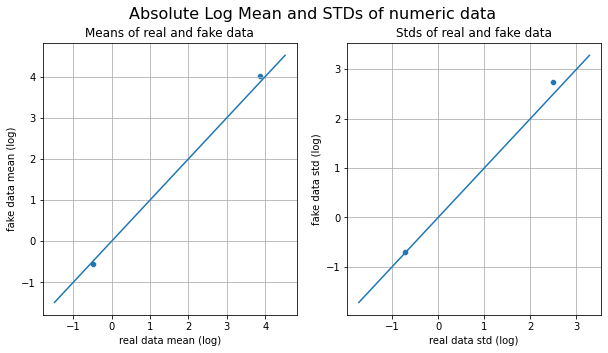

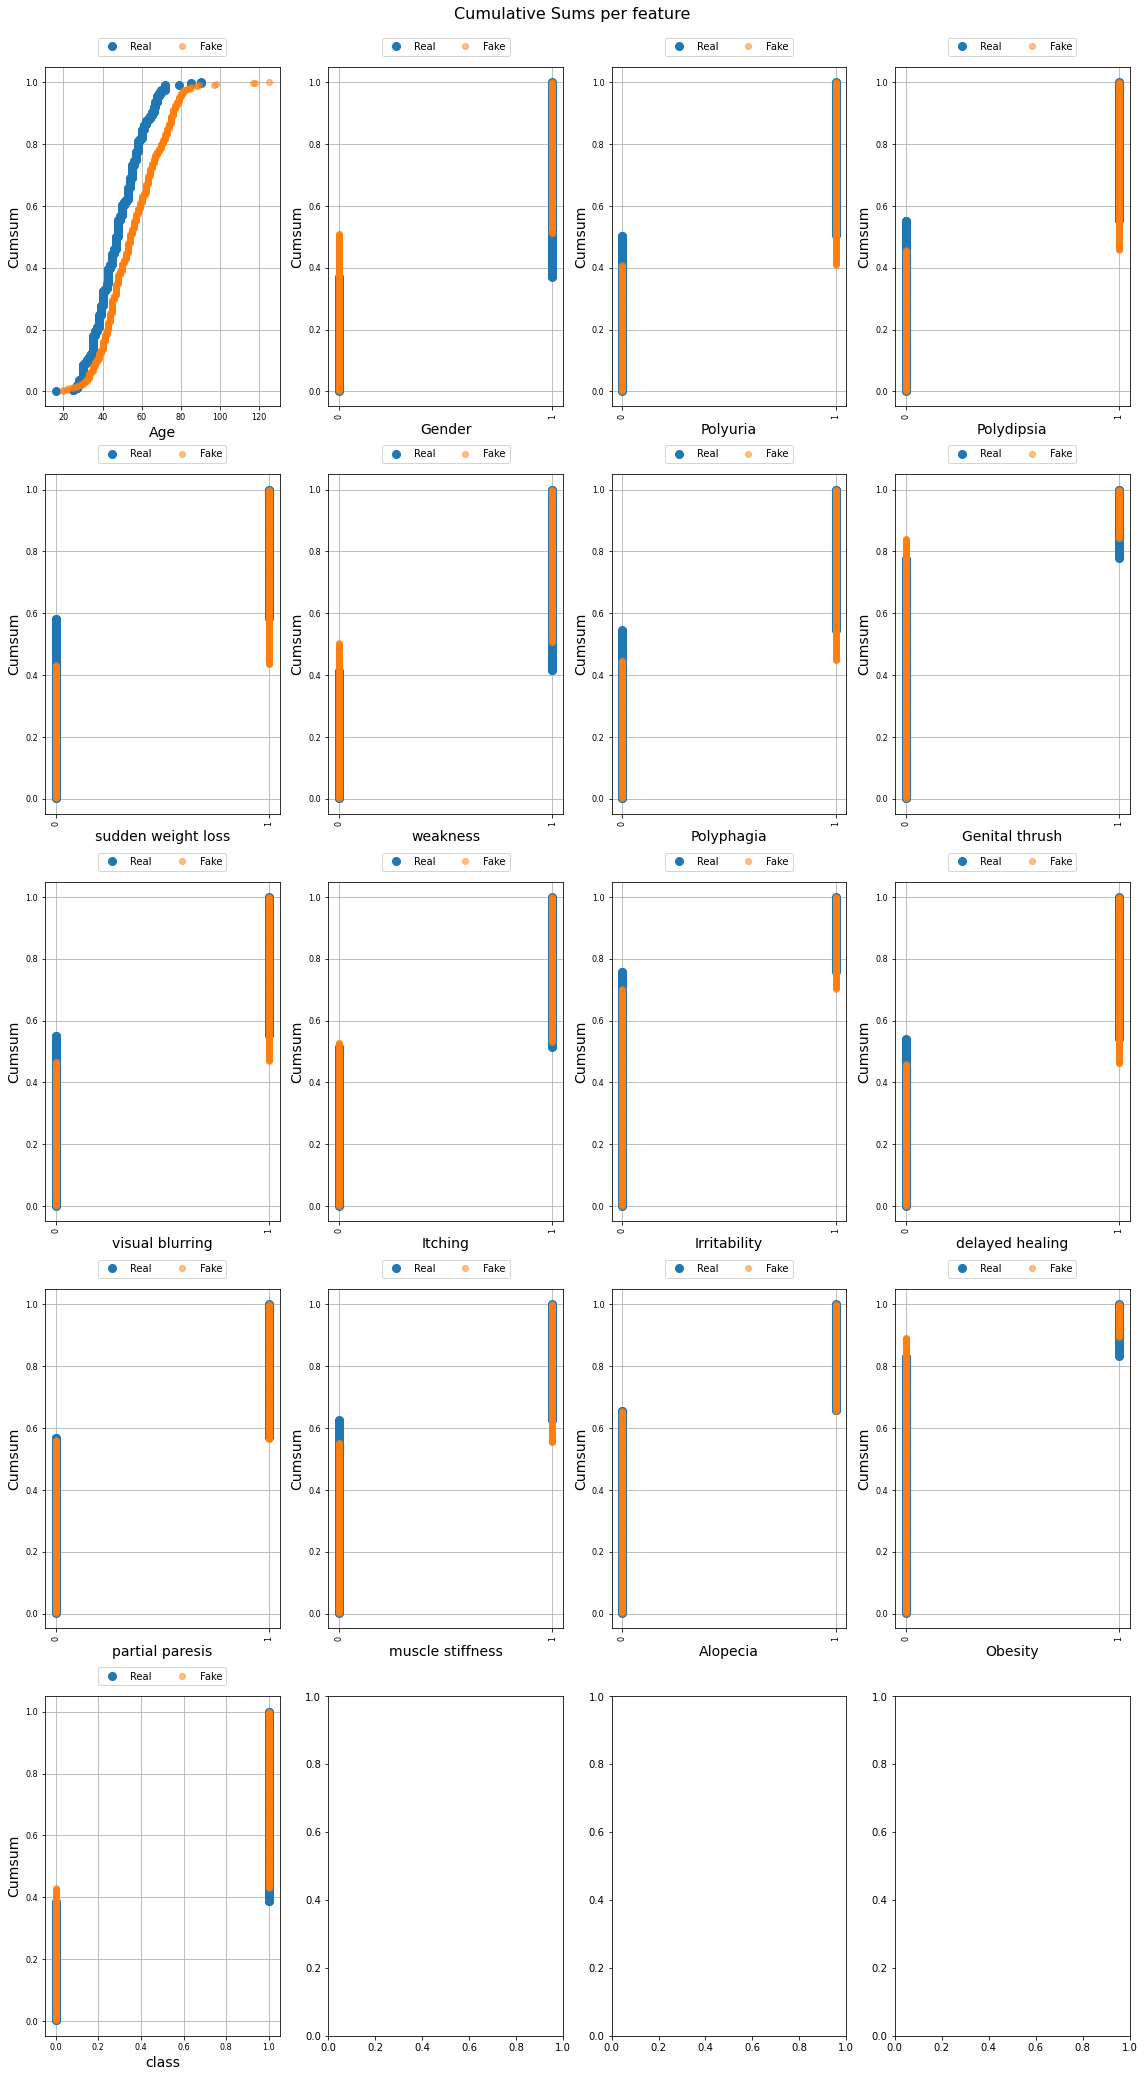

/Users/baukebrenninkmeijer/Projects/table-evaluator/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/Users/baukebrenninkmeijer/Projects/table-evaluator/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})


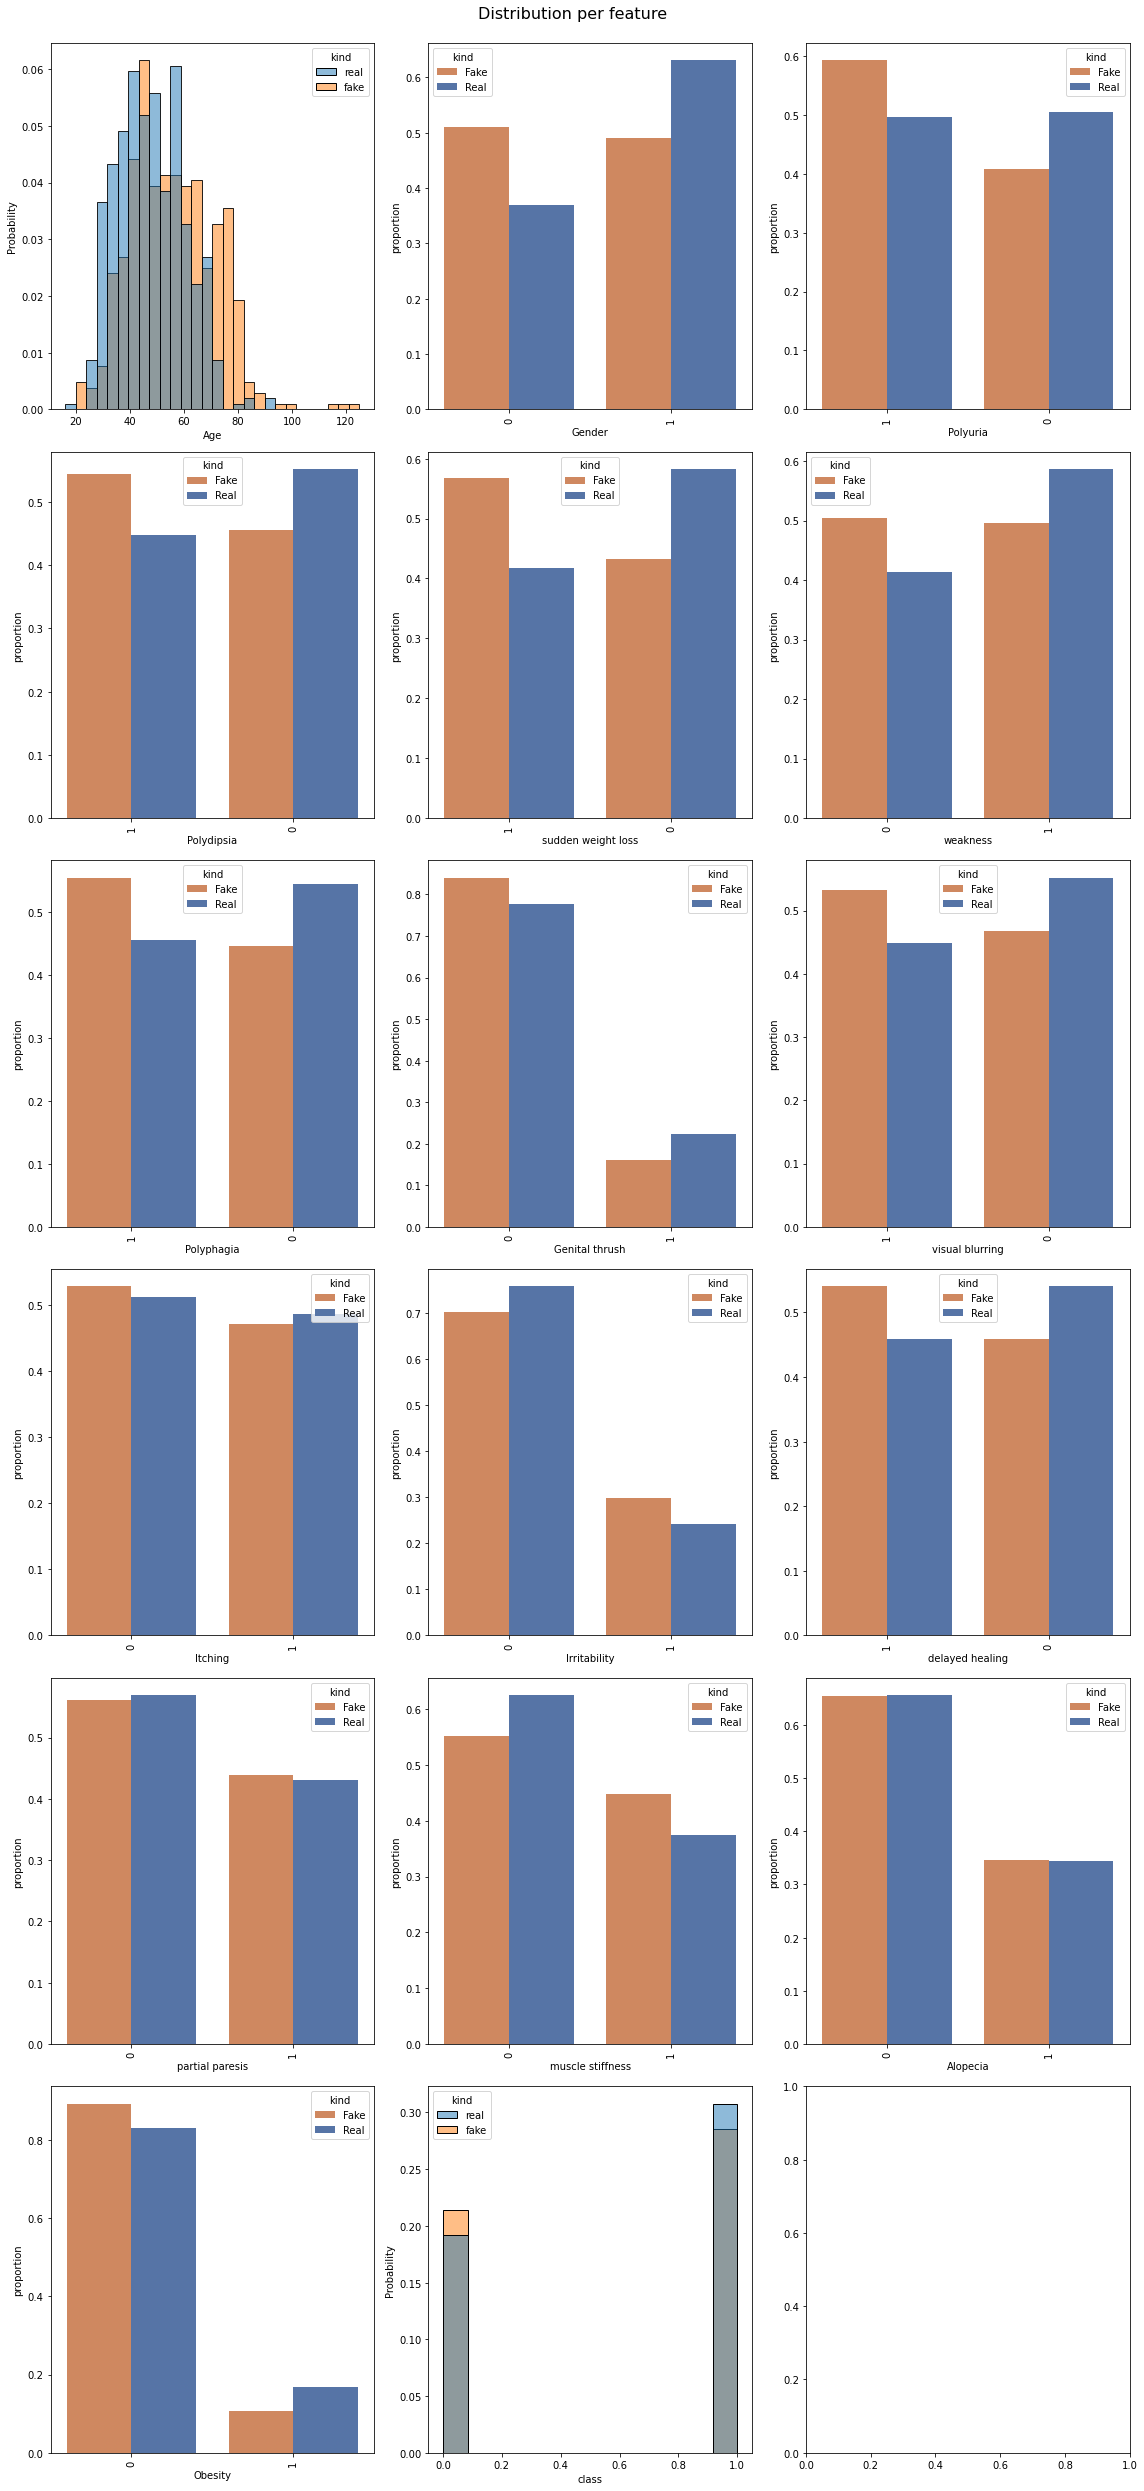

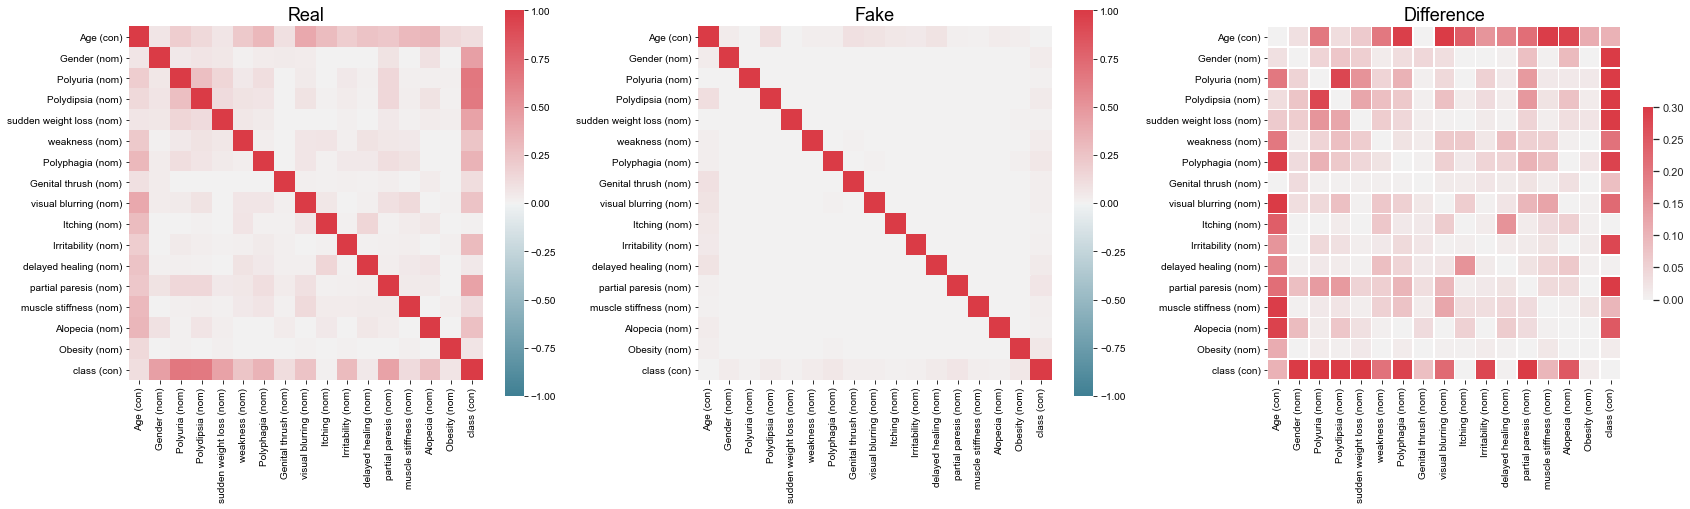

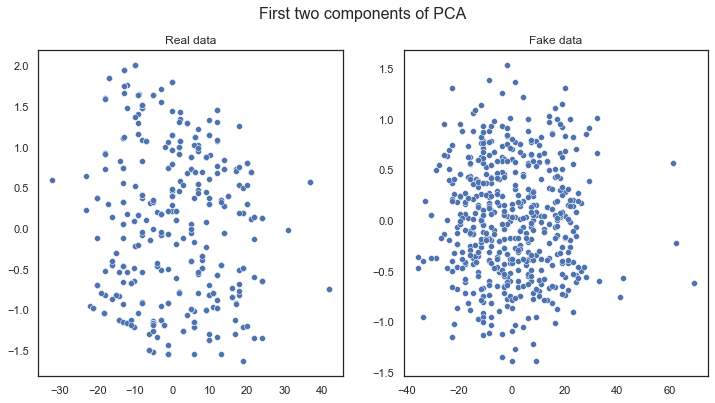

In [15]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer(epochs=50)
ctgan.fit(real_data, discrete_columns)

synthetic_data = ctgan.sample(520)
print(synthetic_data.head(5))

from table_evaluator import load_data, TableEvaluator

print(real_data.shape, synthetic_data.shape)
# cat_cols = ['Outcome']
cat_cols = discrete_columns
table_evaluator = TableEvaluator(real_data, synthetic_data, cat_cols=cat_cols)

table_evaluator.visual_evaluation()